In [1]:
import numpy as np
from keras.utils import to_categorical

import glob
import cv2 
import math

from scipy.linalg import svd
from numpy import linalg as LA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split



%matplotlib inline

Using TensorFlow backend.


In [2]:
path = glob.glob("F:/Program Files/Detected/*.png")


In [3]:
X=[]
for img in path:
    n = cv2.imread(img)
    gray = cv2.cvtColor(n,cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray,(50,50))
    X.append(gray)


In [6]:
# Convert List dataset into array
#len(X)
X= np.array(X)



In [7]:
#data = pd.read_csv('F:/Program Files/Annotations/Train_Expression.txt', sep=" ", header=None)
#data.columns = ["filename", "expression"]

In [7]:
Y = np.zeros((len(X)))

i = 0
for img in path:
    if "_Anger_" in img: 
        #print(row["filename"])
        Y[i]  = 0
    elif "_Disgust_" in img:
        Y[i]  = 1 
    elif "_Fear_" in img:
        Y[i]  = 2 
    elif "_Happy_" in img:
        Y[i]  = 3 
    elif "_Neutral_" in img:
        Y[i]  = 4 
    elif "_Surprise_" in img:
        Y[i]  = 5 
    elif "_Sad_" in img:
        Y[i]  = 6 
    i = i+1


In [8]:

Y


array([0., 0., 0., ..., 5., 5., 5.])

In [9]:
Y_one_hot = to_categorical(Y)


In [10]:
Y_one_hot,Y

(array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.]], dtype=float32),
 array([0., 0., 0., ..., 5., 5., 5.]))

In [11]:
X = X.astype('float32')
X = X / 255

X = X.reshape(-1,50,50, 1)

In [38]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y = train_test_split(X, Y_one_hot, test_size=0.1, random_state=13)
train_X.shape,test_X.shape,train_Y.shape,test_Y.shape

((4622, 50, 50, 1), (514, 50, 50, 1), (4622, 7), (514, 7))

In [39]:
train_X,valid_X,train_Y,valid_Y = train_test_split(train_X, train_Y, test_size=0.2, random_state=13)
train_X.shape,valid_X.shape,train_Y.shape,valid_Y.shape

((3697, 50, 50, 1), (925, 50, 50, 1), (3697, 7), (925, 7))

In [14]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [31]:

batch_size = 128
epochs = 30
num_classes = 7

In [32]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='valid',input_shape=(50,50,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='valid'))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='linear',padding='valid'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='valid'))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='linear',padding='valid'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='valid'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))           
model.add(Dropout(0.3))
model.add(Dense(64, activation='linear'))
model.add(LeakyReLU(alpha=0.1))           
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))


In [33]:
#compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 22, 22, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 11, 11, 64)        0         
__________

In [35]:
model_train = model.fit(train_X, train_Y, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_Y))

Train on 3697 samples, validate on 925 samples
Epoch 1/30
3697/3697 [==============================] - 17s 5ms/step - loss: 1.9505 - acc: 0.1482 - val_loss: 1.9462 - val_acc: 0.1330

In [36]:
model.save("CNN_model.h5")

In [40]:
test_eval = model.evaluate(test_X, test_Y, verbose=1)

514/514 [==============================] - 1s 1ms/step


In [41]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.5775434253048805
Test accuracy: 0.8132295719844358


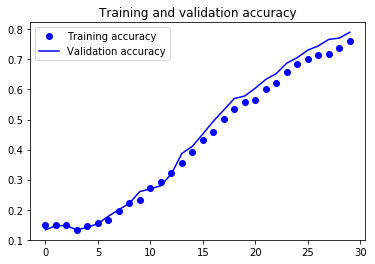

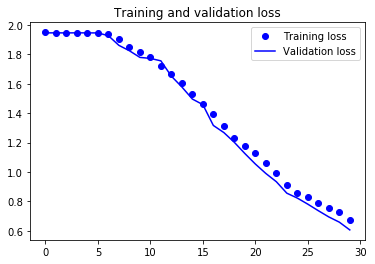

In [42]:
accuracy = model_train.history['acc']
val_accuracy = model_train.history['val_acc']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [43]:
predicted_classes = model.predict(test_X)

In [44]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [45]:
test_Y = np.argmax(np.round(test_Y),axis=1)

In [46]:
predicted_classes.shape, test_Y.shape

((514,), (514,))

Found 372 correct labels


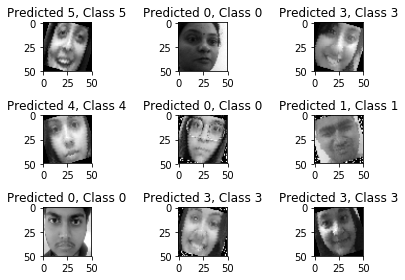

In [47]:
correct = np.where(predicted_classes==test_Y)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(50,50), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 142 incorrect labels


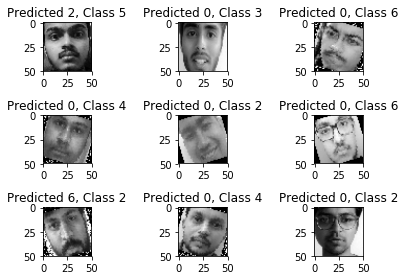

In [48]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(50,50), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

In [49]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))
 

             precision    recall  f1-score   support

    Class 0       0.43      0.98      0.60        81
    Class 1       0.92      0.69      0.79        64
    Class 2       0.91      0.60      0.72        82
    Class 3       0.97      0.85      0.90        71
    Class 4       0.83      0.59      0.69        73
    Class 5       0.92      0.77      0.84        60
    Class 6       0.80      0.61      0.69        83

avg / total       0.81      0.72      0.74       514

